<a href="https://colab.research.google.com/github/Yashwati-patel/Netflix-Movies-And-TV-Shows/blob/main/FINAL_NOTEBOOK_OF_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#**Import Libraries**

In [30]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics


import warnings
warnings.filterwarnings(action='ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Mounting Drive**

In [2]:
# Drive Mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading Dataset**

In [3]:
# Load Dataset
Df =pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT-1/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

#**Data Understanding**

In [4]:
# Display first five rows
Df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Display Last five rows
Df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
# check Data
Df.shape

(7787, 12)

In [7]:
# check duplicates in dataset
len(Df[Df.duplicated()])

0

In [8]:
# check information
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
# check columns details
Df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# find details
Df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


# **Handling Null values**

In [11]:
# Find the null value for each column
Df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
# Display the unique values 
Df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [13]:
# FIND TYPE OF SHOWS

Df.type.unique()

array(['TV Show', 'Movie'], dtype=object)

In [14]:
# Rating from Dataset

Df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

**Handling Null Values**

In [15]:
# Checking Null Values

Df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [16]:
# Find Percentage of Null Values 

Df.isnull().sum()/Df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [17]:
# Drop Null Values From Dataset

Df.drop(['director'],axis=1,inplace=True)
 
DF=Df.dropna(subset=['cast','country','date_added','rating'],axis=0)

In [18]:
# Rechecking Null values

DF.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now our Data is ready for next operation.

# **Exploratory Data Analysis**

 **Type Of Content In Dataset**

In [19]:
# type of content

DF['type'].value_counts().sort_values()

TV Show    1882
Movie      4761
Name: type, dtype: int64

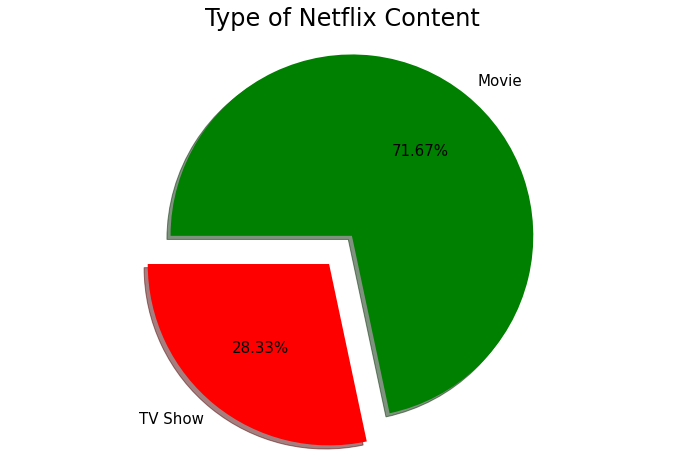

In [20]:
# Plotting Pie chart for type of content

plt.figure(figsize=(12, 8))
labels=['TV Show', 'Movie']
textprops = {"fontsize":15}
plt.pie(DF['type'].value_counts().sort_values(),labels=labels,autopct='%1.2f%%',explode=[0.1,0.1],
        colors=['red','green'], startangle=180, shadow = True, textprops=textprops)
plt.title('Type of Netflix Content',fontsize=24)
plt.axis('equal')
plt.show()

From above analysis we can see that number of movies are more than TV shows.

**CHECK TOP 5 ACTORS**

In [21]:
# Count top ten actors

DF['cast_name'] = DF['cast'].apply(lambda x :  x.split(',')) 
cast_count = []

# find number of movies for each actor

for i in DF['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

DF_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:6]


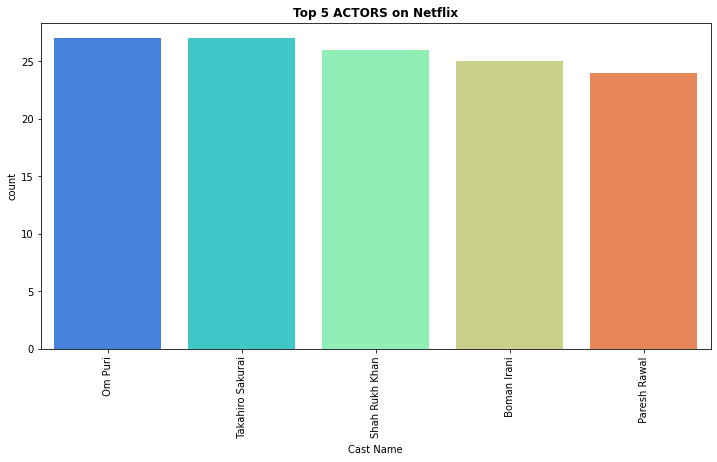

In [22]:
# plotting graph for top ten actors

plt.figure(figsize=(12,6))
sns.barplot(x='cast_name',y='count',data=DF_cast_count,palette="rainbow")
plt.title("Top 5 ACTORS on Netflix",size='12',fontweight="bold")
plt.xlabel('Cast Name')
plt.xticks(rotation=90)
plt.show()

**CHECK TOP 10 GENRES**

In [23]:
# Count Top 10 genres 

DF['listed_in'] = DF['listed_in'].apply(lambda x :  x.split(',')) 
genre_count = []

# Find number of movies for each genres 

for i in DF['listed_in']: 
  genre_count += i
    
genre_dict = dict((i, genre_count.count(i)) for i in genre_count)

DF_genre_count = pd.DataFrame(genre_dict.values(),genre_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'genre', 0 : 'count'}).iloc[1:11]

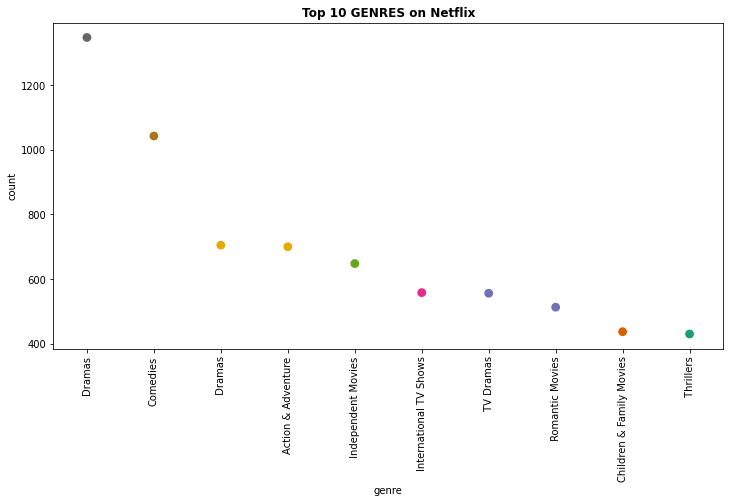

In [24]:
# Plotting graph for top ten genres

plt.figure(figsize=(12,6))
sns.pointplot(x='genre',y='count',data=DF_genre_count,palette="Dark2_r")
plt.title("Top 10 GENRES on Netflix",size='12',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

In [25]:
# Find Movies and TV show in Dataframe

MOVIES_DF= DF[DF['type']=='Movie']
TVSHOWS_DF= DF[DF['type']=='TV Show']
MOVIES_DF.shape

(4761, 12)

**TOP MOVIES BASED ON RATINGS**

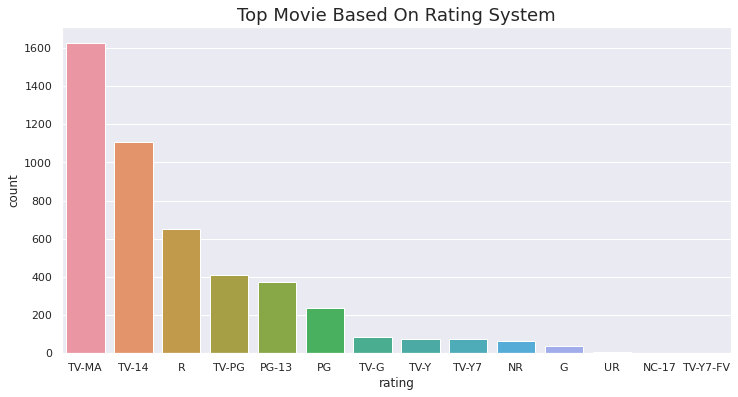

In [58]:
# find top movies based on ratings

Movie_Ratings = MOVIES_DF.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

fig, ax = plt.subplots(figsize=(12,6))  
sns.barplot(x='rating',y='count',data=Movie_Ratings)
plt.title('Top Movie Based On Rating System',size='18')
plt.show()

**TOP SHOWS BASED ON RATINGS**

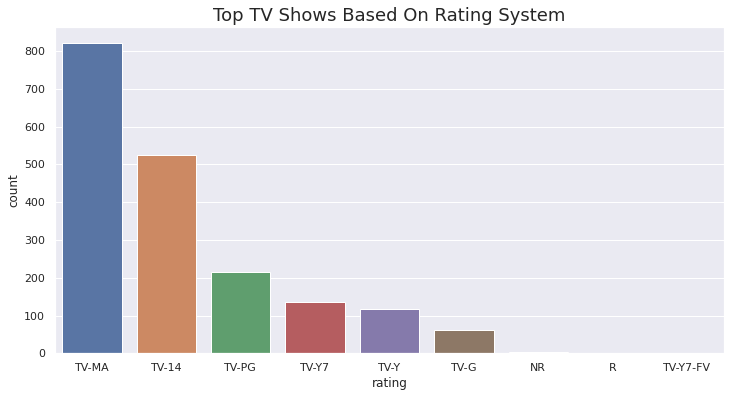

In [57]:
# Find top shows based on ratings

TV_Ratings = TVSHOWS_DF.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

fig, ax = plt.subplots(figsize=(12,6))  
sns.barplot(x='rating',y='count',data=TV_Ratings)
plt.title('Top TV Shows Based On Rating System',size='18')
plt.show()

**TOP 10 COUNTRIES**

Text(0, 0.5, 'Country Name')

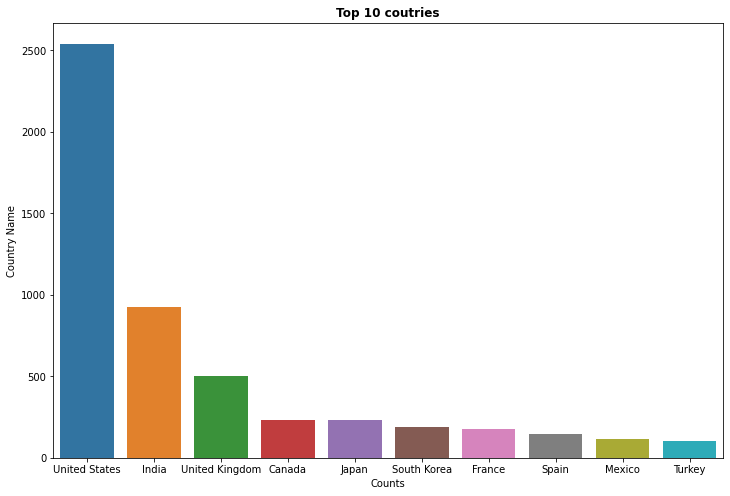

In [28]:
# Find top country

DF['Main_Country']= DF['country'].apply(lambda x: x.split(",")[0])

plt.figure(figsize=(12,8))
ax=sns.countplot(x='Main_Country',lw=2,data=DF,
              order=DF['Main_Country'].value_counts().index[0:10])

plt.title('Top 10 coutries',fontweight="bold")
plt.xlabel('Counts')
plt.ylabel('Country Name')

Here we can see that The United States has the most number of content on Netflix as compare to other countries.

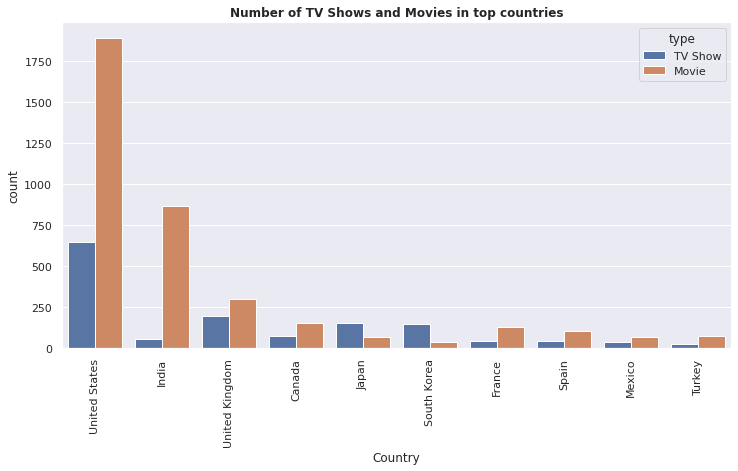

In [29]:
# find Number of TV Shows and Movies content in top countries.

sns.set()
plt.figure(figsize=(12,6))
ax=sns.countplot(x="Main_Country",data= DF,hue= "type",order = DF['Main_Country'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title("Number of TV Shows and Movies in top countries",fontweight="bold")
plt.show()

**Rating movies and TV shows based on age group**

In [46]:
# Dataset from each type of content by filtering
DF_TV = DF[DF["type"] == "TV Show"]
DF_Movies = DF[DF["type"] == "Movie"]

In [47]:
# Find the Ratings into grouped categories
Ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

DF['Target_ages'] = DF['rating'].replace(Ratings_ages)
DF['Target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

**Movies Rating Based On Age Group**

In [48]:
# Check ages
DF['type'] = pd.Categorical(DF['type'])
DF['Target_ages'] = pd.Categorical(DF['Target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

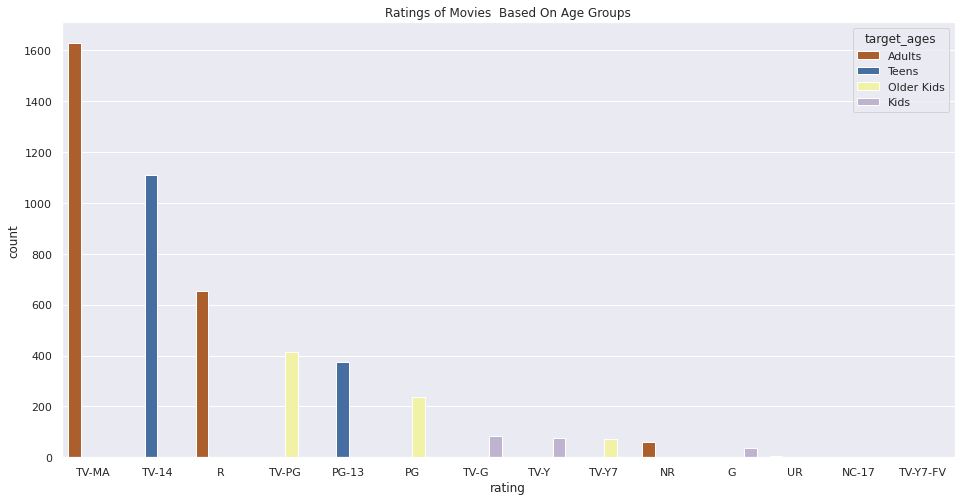

In [78]:
# Plotting movies ratings based on  Age Groups

plt.figure(figsize=(16,8))
plt.title('Ratings of Movies  Based On Age Groups')
sns.countplot(x=DF_Movies['rating'],hue=DF_Movies['target_ages'],data=DF_Movies,order=DF_Movies['rating'].value_counts().index,palette="Accent_r")

**TV Shows Rating Based On Age Group**

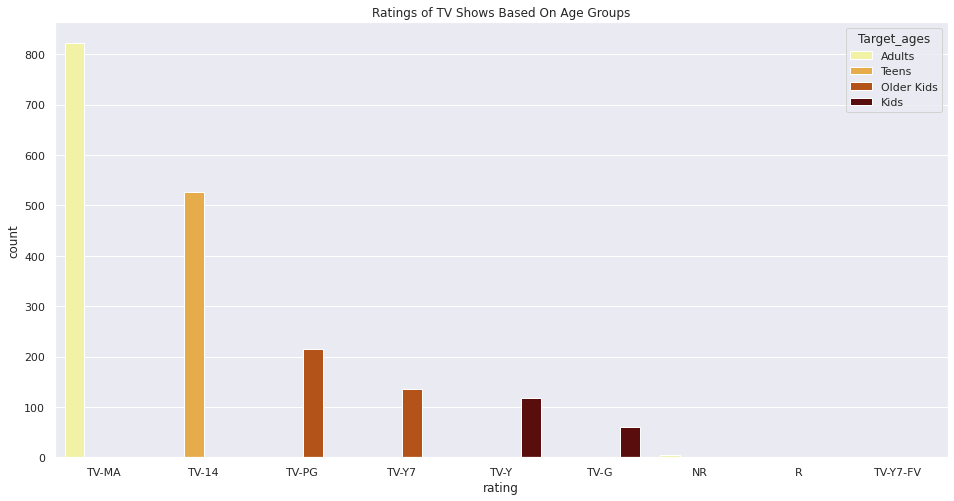

In [80]:
# Plotting TV SHOWS ratings based on  Age Groups

plt.figure(figsize=(16,8))
plt.title('Ratings of TV Shows Based On Age Groups')
sns.countplot(x=DF_TV['rating'],hue=DF_TV['Target_ages'],data=DF_TV,order=DF_TV['rating'].value_counts().index,palette="afmhot_r")

**YEAR-MONTH WISE RELEASE**

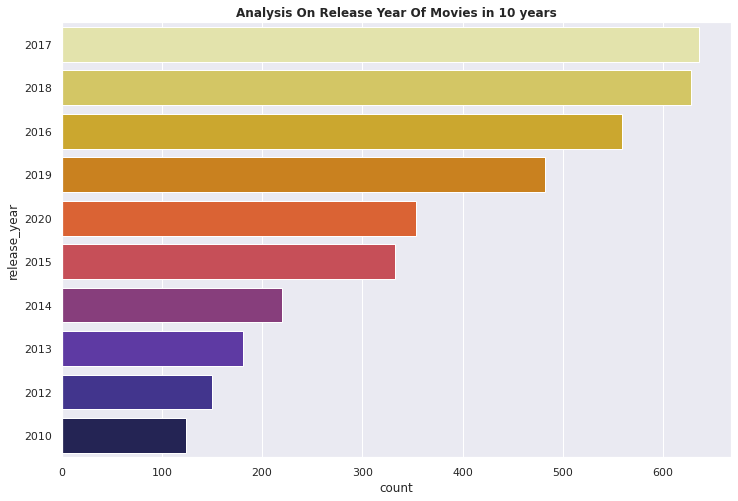

In [76]:
#feature engineering
# find movie release per year in last 10 year


plt.figure(figsize=(12,8))
plt.title('Analysis On Release Year Of Movies in 10 years', fontsize=12, fontweight='bold')
sns.countplot(y=MOVIES_DF['release_year'],data=MOVIES_DF,order=MOVIES_DF['release_year'].value_counts().index[0:10],palette="CMRmap_r")





From above analysis we can see that more number of movie release in 2017.

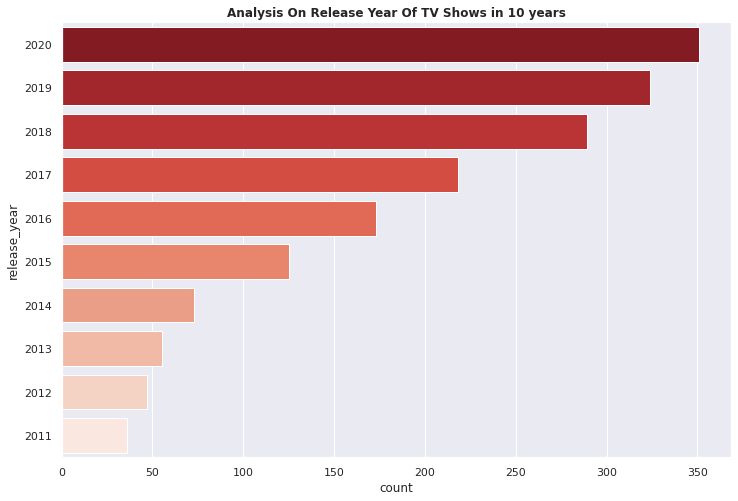

In [74]:
# TV SHOWS released per year in last 10 year.

plt.figure(figsize=(12,8))
plt.title('Analysis On Release Year Of TV Shows in 10 years', fontsize=12, fontweight='bold')
sns.countplot(y=TVSHOWS_DF['release_year'],data=TVSHOWS_DF,order=TVSHOWS_DF['release_year'].value_counts().index[0:10],palette="Reds_r")

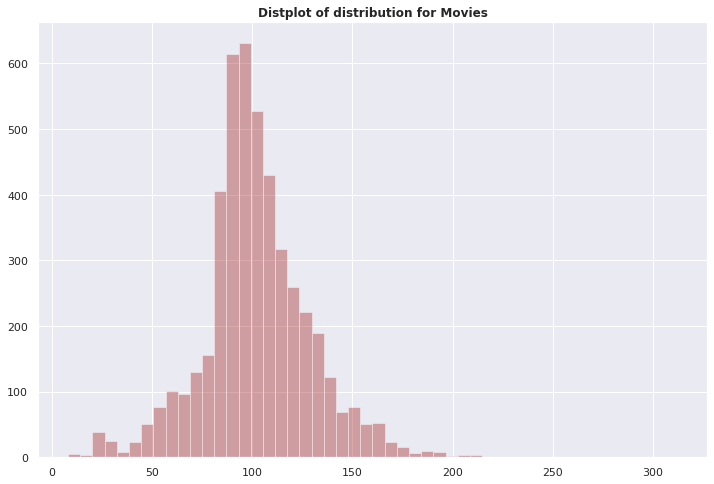

In [82]:
# find Distribution of Movie Durations

plt.figure(figsize=(12,8))
sns.distplot(MOVIES_DF['duration'].str.extract('(\d+)'),kde=False, color=['brown'])
plt.title('Distplot of distribution for Movies',fontweight="bold")
plt.show()

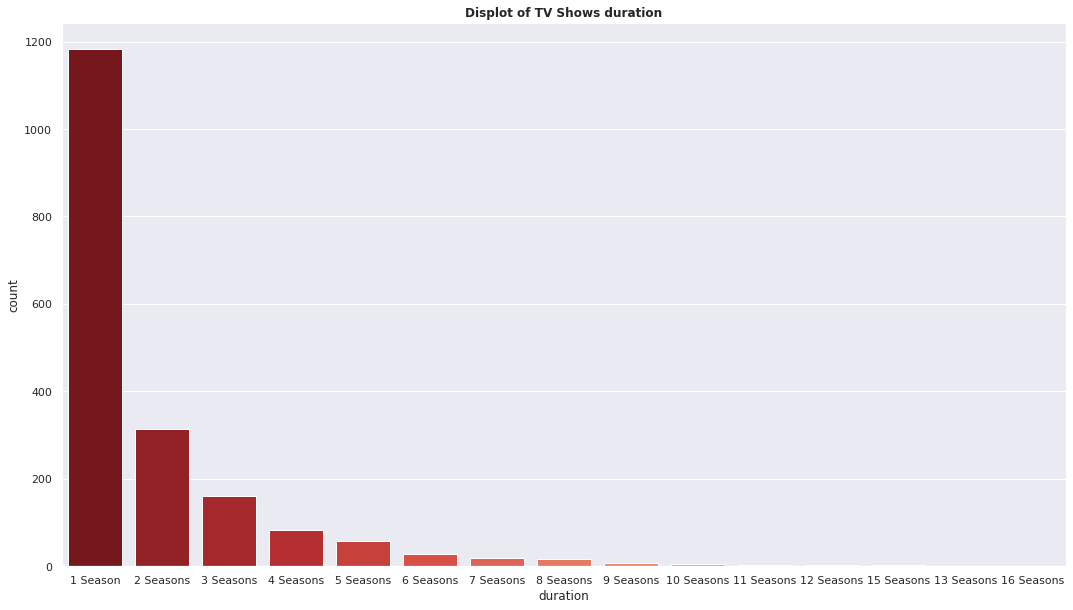

In [89]:
# Find the distribution of TV SHOWS

plt.figure(figsize=(18,10))
plt.title("Displot of TV Shows duration",fontweight='bold')
sns.countplot(x=TVSHOWS_DF['duration'],data=TVSHOWS_DF,order = TVSHOWS_DF['duration'].value_counts().index,palette="Reds_r")